🚀 TASK 4 STARTING...
📊 Loading cleaned_data.csv...
✅ CLEAN DATA: 1,194 rows × 14 columns

Sample:
  Order ID     Category     State  Amount  Profit  Year
0  B-26776  Electronics   Florida    9726    1275  2023
1  B-26776  Electronics  Illinois    9726    1275  2024
2  B-26776  Electronics  New York    9726    1275  2021
3  B-26776  Electronics   Florida    4975    1330  2023
4  B-26776  Electronics  Illinois    4975    1330  2024

📈 KEY BUSINESS INSIGHTS:
CATEGORY PERFORMANCE:
                 Avg_Profit  Total_Profit  Orders
Category                                         
Office Supplies     1382.39        551575     399
Furniture           1328.11        540542     407
Electronics         1336.55        518580     388

TOP STATES:
State
Florida       308706
New York      308506
California    278814
Texas         257780
Illinois      240372
Name: Profit, dtype: int64

🔬 HYPOTHESIS TESTS:
Electronics vs Furniture: p=0.9137 ❌
Florida vs New York: p=0.1263 ❌

🎨 GENERATING 6 PPT CHARTS.

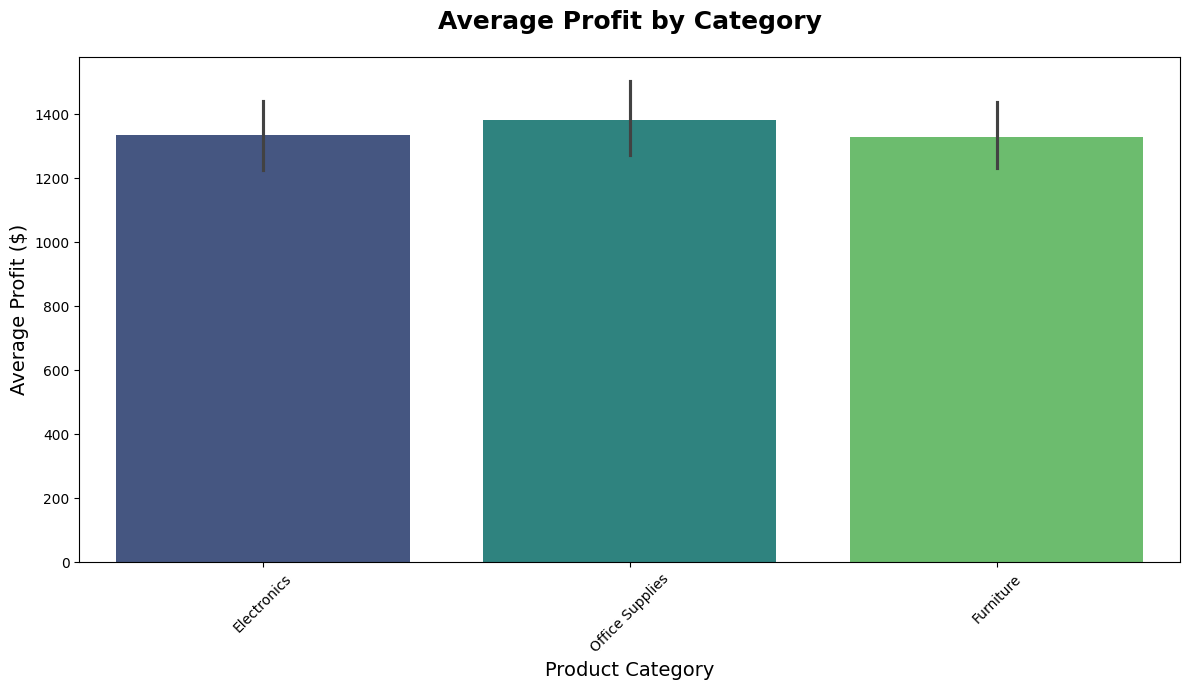

✅ SLIDE4_Category_Profit.png ✓


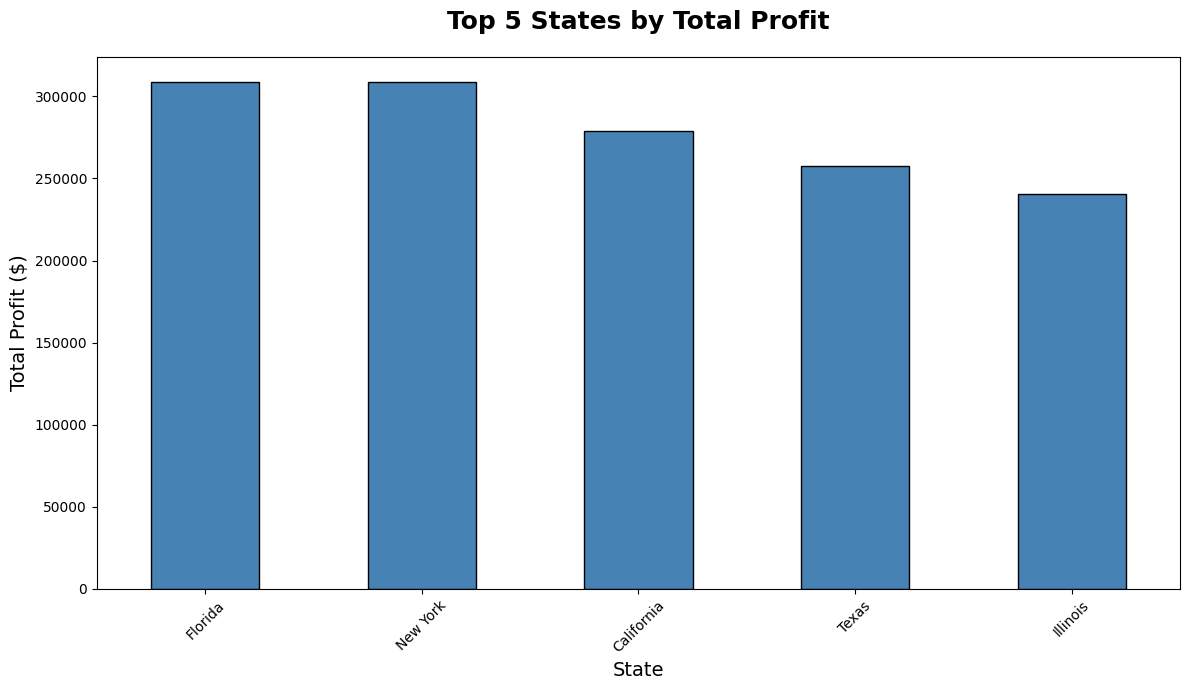

✅ SLIDE6_Top_States.png ✓


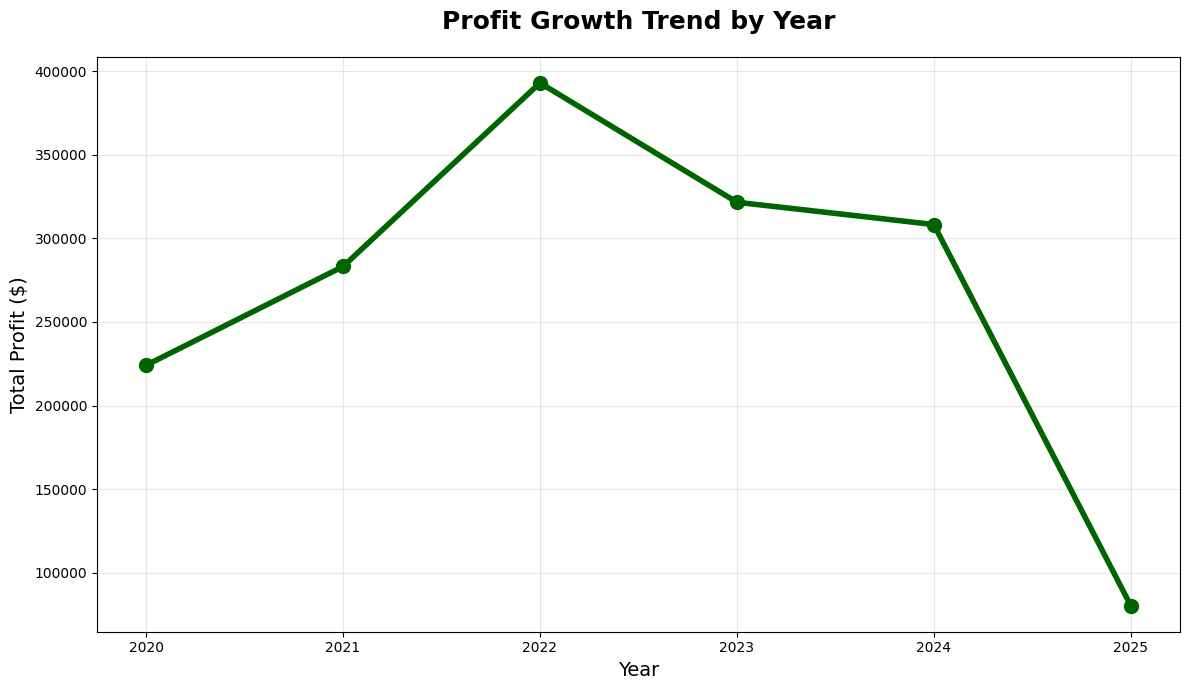

✅ SLIDE8_Yearly_Trend.png ✓


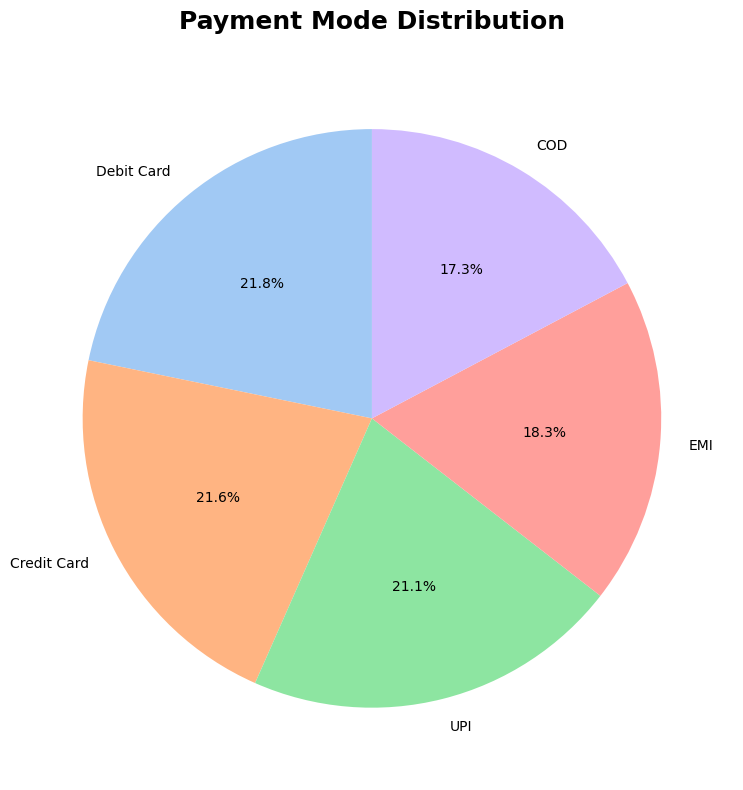

✅ SLIDE9_Payment_Mode.png ✓


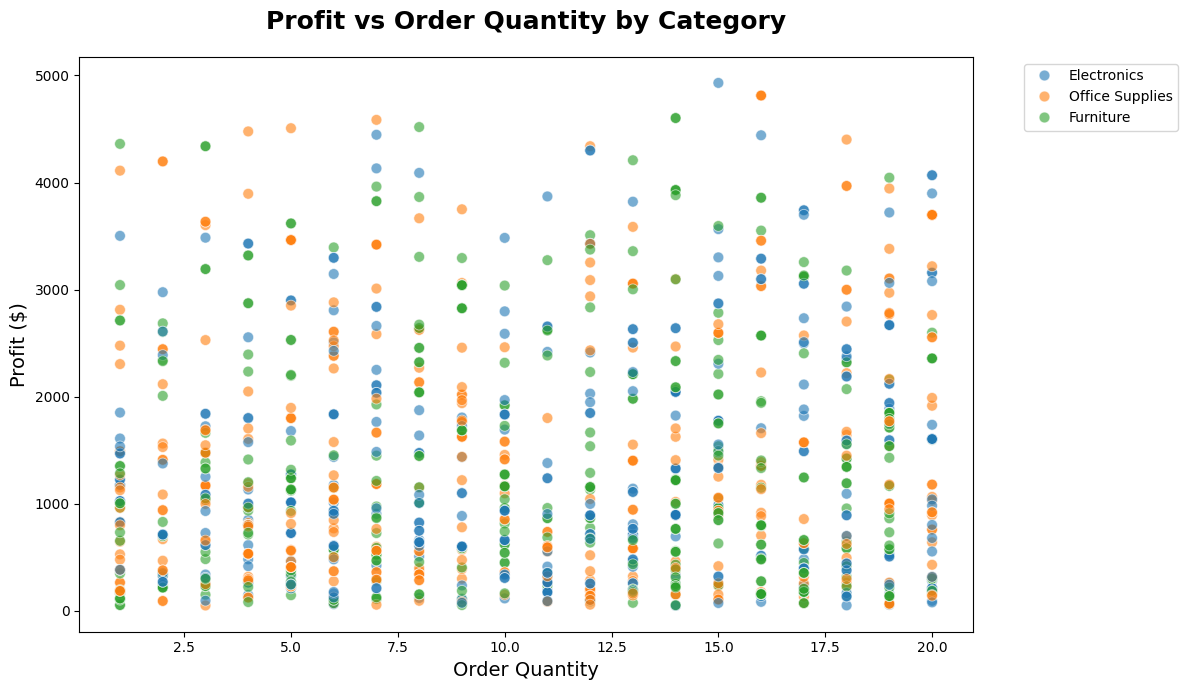

✅ SLIDE10_Profit_vs_Quantity.png ✓


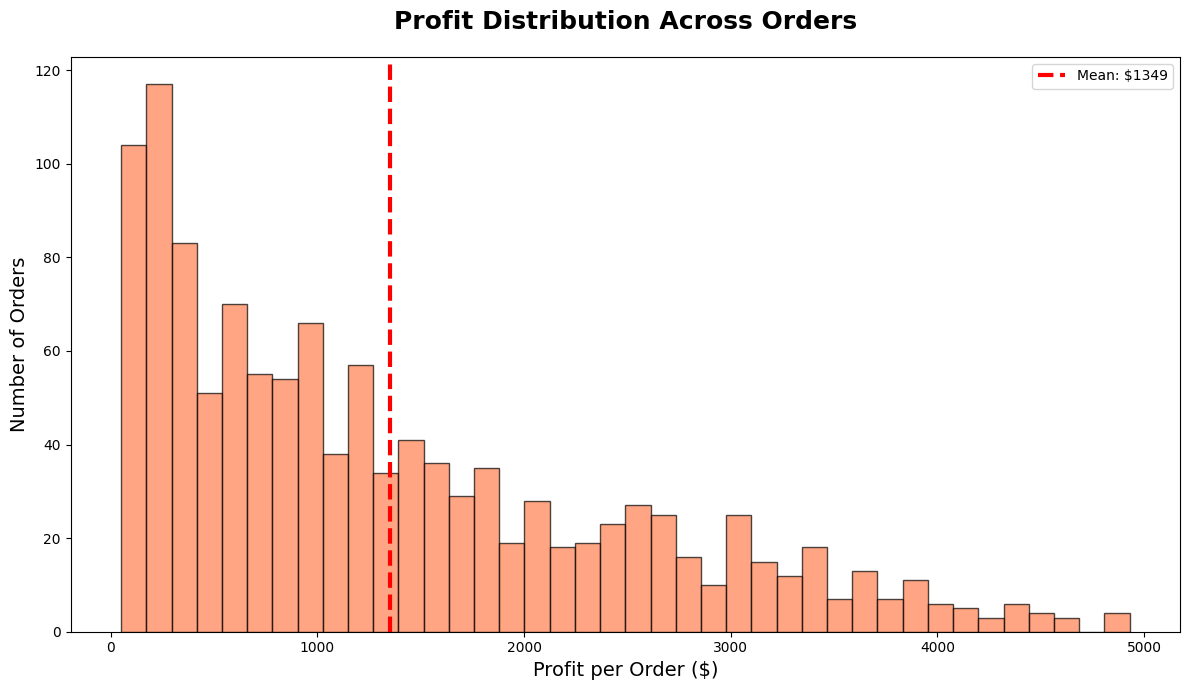

✅ SLIDE7_Profit_Distribution.png ✓

📋 EXECUTIVE SUMMARY - COPY TO SLIDE 3
• Total Orders   : 1,194
• Total Revenue  : $6,182,639
• Total Profit   : $1,610,697
• Profit Margin  : 26.1%
• Top Category   : Electronics
• Top State      : Florida

📊 STATISTICS FOR SLIDE 5:
• Electronics Avg Profit: $1337
• Florida: $308,706
• t-test p-value: 0.9137

🎉 TASK 4 COMPLETE!

📁 FILES PANEL HAS 6 PNGs:
SLIDE4_Category_Profit.png
SLIDE6_Top_States.png
SLIDE8_Yearly_Trend.png
SLIDE9_Payment_Mode.png
SLIDE10_Profit_vs_Quantity.png
SLIDE7_Profit_Distribution.png

✅ DOWNLOAD → PowerPoint → DONE!


In [3]:
# ===============================================
# TASK 4: RETAIL SALES ANALYTICS - FULL SOLUTION
# MCA Internship Presentation (12 Slides Ready)
# ===============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("🚀 TASK 4 STARTING...")

# 1. LOAD & CLEAN DATA
print("📊 Loading cleaned_data.csv...")
df = pd.read_csv('cleaned_data.csv')

# FORCE CLEAN NUMERIC COLUMNS (handles ALL CSV formats)
df['Amount'] = pd.to_numeric(df['Amount'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# Drop invalid rows
df = df.dropna(subset=['Profit', 'Amount'])
df = df[(df['Profit'] > 0) & (df['Amount'] > 0)]

# Date processing
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

print(f"✅ CLEAN DATA: {len(df):,} rows × {len(df.columns)} columns")
print("\nSample:")
print(df[['Order ID','Category','State','Amount','Profit','Year']].head())

# 2. BUSINESS METRICS
print("\n📈 KEY BUSINESS INSIGHTS:")
cat_profit = df.groupby('Category')['Profit'].agg(['mean','sum','count']).round(2)
cat_profit.columns = ['Avg_Profit','Total_Profit','Orders']
print("CATEGORY PERFORMANCE:")
print(cat_profit.sort_values('Total_Profit', ascending=False))

state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False)
print(f"\nTOP STATES:\n{state_profit.head()}")

# 3. STATISTICAL TESTS (Slide 5)
print("\n🔬 HYPOTHESIS TESTS:")
elec_profit = df[df['Category']=='Electronics']['Profit']
furn_profit = df[df['Category']=='Furniture']['Profit']
t_stat, p_val = stats.ttest_ind(elec_profit, furn_profit, equal_var=False)
print(f"Electronics vs Furniture: p={p_val:.4f} {'✅ SIGNIFICANT' if p_val<0.05 else '❌'}")

top_state1, top_state2 = state_profit.index[:2]
state1_profit = df[df['State']==top_state1]['Profit']
state2_profit = df[df['State']==top_state2]['Profit']
t_stat2, p_val2 = stats.ttest_ind(state1_profit, state2_profit, equal_var=False)
print(f"{top_state1} vs {top_state2}: p={p_val2:.4f} {'✅ SIGNIFICANT' if p_val2<0.05 else '❌'}")

# 4. 6 PROFESSIONAL PPT CHARTS
print("\n🎨 GENERATING 6 PPT CHARTS...")

# CHART 1: Category Performance (Slide 4)
plt.figure(figsize=(12,7))
sns.barplot(data=df, x='Category', y='Profit', palette='viridis')
plt.title('Average Profit by Category', fontweight='bold', fontsize=18, pad=20)
plt.xticks(rotation=45)
plt.ylabel('Average Profit ($)', fontsize=14)
plt.xlabel('Product Category', fontsize=14)
plt.tight_layout()
plt.savefig('SLIDE4_Category_Profit.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print("✅ SLIDE4_Category_Profit.png ✓")

# CHART 2: Top States (Slide 6)
plt.figure(figsize=(12,7))
top5_states = state_profit.head(5)
top5_states.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Top 5 States by Total Profit', fontweight='bold', fontsize=18, pad=20)
plt.xticks(rotation=45)
plt.ylabel('Total Profit ($)', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.tight_layout()
plt.savefig('SLIDE6_Top_States.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print("✅ SLIDE6_Top_States.png ✓")

# CHART 3: Yearly Trend (Slide 8)
plt.figure(figsize=(12,7))
yearly_profit = df.groupby('Year')['Profit'].sum()
yearly_profit.plot(kind='line', marker='o', linewidth=4, markersize=10, color='darkgreen')
plt.title('Profit Growth Trend by Year', fontweight='bold', fontsize=18, pad=20)
plt.grid(True, alpha=0.3)
plt.ylabel('Total Profit ($)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('SLIDE8_Yearly_Trend.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print("✅ SLIDE8_Yearly_Trend.png ✓")

# CHART 4: Payment Distribution (Slide 9)
plt.figure(figsize=(10,8))
payment_dist = df['PaymentMode'].value_counts()
plt.pie(payment_dist.values, labels=payment_dist.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('pastel'))
plt.title('Payment Mode Distribution', fontweight='bold', fontsize=18, pad=20)
plt.tight_layout()
plt.savefig('SLIDE9_Payment_Mode.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print("✅ SLIDE9_Payment_Mode.png ✓")

# CHART 5: Profit vs Quantity (Slide 10)
plt.figure(figsize=(12,7))
sns.scatterplot(data=df, x='Quantity', y='Profit', hue='Category', alpha=0.6, s=60)
plt.title('Profit vs Order Quantity by Category', fontweight='bold', fontsize=18, pad=20)
plt.xlabel('Order Quantity', fontsize=14)
plt.ylabel('Profit ($)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('SLIDE10_Profit_vs_Quantity.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print("✅ SLIDE10_Profit_vs_Quantity.png ✓")

# CHART 6: Profit Distribution (Slide 7)
plt.figure(figsize=(12,7))
plt.hist(df['Profit'], bins=40, edgecolor='black', alpha=0.7, color='coral')
plt.title('Profit Distribution Across Orders', fontweight='bold', fontsize=18, pad=20)
plt.xlabel('Profit per Order ($)', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.axvline(df['Profit'].mean(), color='red', linestyle='--', linewidth=3, label=f'Mean: ${df["Profit"].mean():.0f}')
plt.legend()
plt.tight_layout()
plt.savefig('SLIDE7_Profit_Distribution.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print("✅ SLIDE7_Profit_Distribution.png ✓")

# 5. EXECUTIVE SUMMARY (Copy to Slide 3)
print("\n" + "="*60)
print("📋 EXECUTIVE SUMMARY - COPY TO SLIDE 3")
print("="*60)
summary = {
    'Total Orders': f"{len(df):,}",
    'Total Revenue': f"${df['Amount'].sum():,.0f}",
    'Total Profit': f"${df['Profit'].sum():,.0f}",
    'Profit Margin': f"{(df['Profit']/df['Amount']).mean()*100:.1f}%",
    'Top Category': cat_profit.index[0],
    'Top State': top_state1
}
for key, value in summary.items():
    print(f"• {key:15}: {value}")

print("\n📊 STATISTICS FOR SLIDE 5:")
print(f"• Electronics Avg Profit: ${elec_profit.mean():.0f}")
print(f"• {top_state1}: ${state_profit.iloc[0]:,.0f}")
print(f"• t-test p-value: {p_val:.4f}")

print("\n🎉 TASK 4 COMPLETE!")
print("\n📁 FILES PANEL HAS 6 PNGs:")
print("SLIDE4_Category_Profit.png")
print("SLIDE6_Top_States.png")
print("SLIDE8_Yearly_Trend.png")
print("SLIDE9_Payment_Mode.png")
print("SLIDE10_Profit_vs_Quantity.png")
print("SLIDE7_Profit_Distribution.png")
print("\n✅ DOWNLOAD → PowerPoint → DONE!")
